<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/ClassifierLogistic_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv("/content/sample_data/winequalitywhite.csv")

# Display the first few rows
print(data.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [13]:
# Assuming 'quality' is the name of the target variable column
x = data.drop('quality', axis=1)  # Features: all columns except 'quality'
y = data['quality']  # Target variable: 'quality' column

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Added this line to split the data

In [19]:
#-----------------------------------Initialise and train model for multiclass classification-------------------------------------------------
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
model.fit(x,  y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [20]:
y_pred = model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")



Accuracy: 0.5122448979591837
Confusion Matrix:
[[  0   0   2   2   0   1]
 [  0   0  13  12   0   0]
 [  0   0 151 137   3   0]
 [  1   0  88 321  22   0]
 [  0   0   9 153  30   0]
 [  0   0   1  23  11   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.57      0.52      0.54       291
           6       0.50      0.74      0.59       432
           7       0.45      0.16      0.23       192
           8       0.00      0.00      0.00        35

    accuracy                           0.51       980
   macro avg       0.25      0.24      0.23       980
weighted avg       0.48      0.51      0.47       980



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

When working with multiclass classification, you must specify the average parameter to define how the scores are computed across classes. Common options include:

average='micro':

Calculates metrics globally by considering all true positives, false positives, and false negatives.
average='macro':

Calculates metrics for each class independently, then averages them without considering class imbalance.
average='weighted':

Similar to macro, but weights the scores for each class by the number of true instances.
average=None:

Returns metrics for each class without averaging.

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

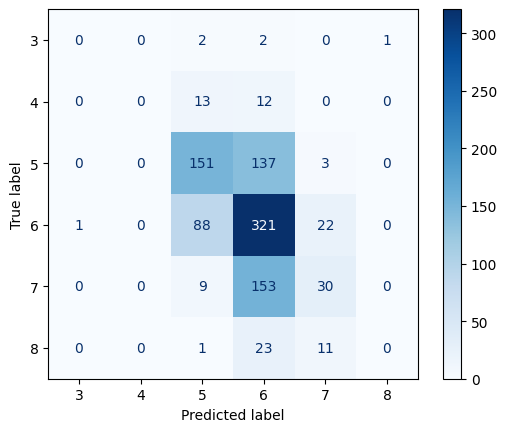

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

#--------------------------------Performance Metrics---------------------------------------------------
# The 'average' parameter needs to be specified for multiclass classification
# Options: 'micro', 'macro', 'weighted', 'samples'
# Choosing 'weighted' to account for class imbalances
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
#------------------------------------------------------------------------------------------------------------------------------------
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.47726113172541745
Recall: 0.5122448979591837
F1 Score: 0.4691807232006568


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


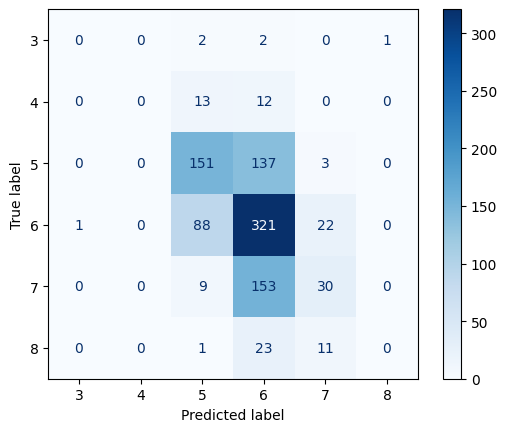

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.show()

Explanation of Changes:

Import label_binarize: This function is used to convert multiclass labels into a binary format suitable for roc_curve.
Binarize Labels: label_binarize is applied to both y_test and y_pred to create binary representations for each class.
Calculate ROC per Class: The code iterates through each class, calculating the ROC curve and AUC using the binarized labels.
Micro-Averaging (Optional): A micro-average ROC curve is calculated by considering all classes together.
Plotting: The code provides an example of plotting the micro-average ROC curve. You can adapt it to plot individual class curves or other variations as needed.

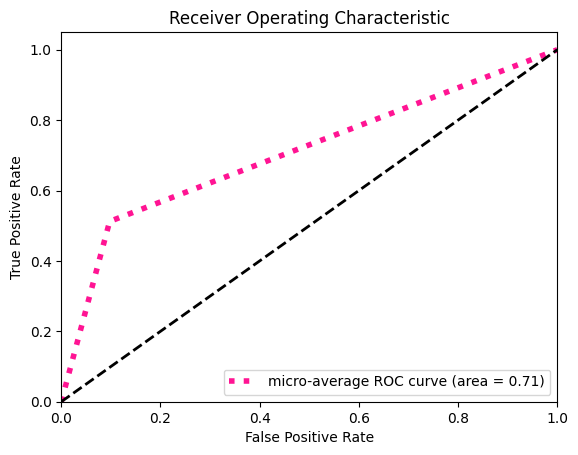

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import numpy as np

#----------------------------------------------------Compute ROC curve and AUC--------------------------------------------------
# Assuming y_test and y_pred are multiclass
n_classes = len(np.unique(y_test))  # Get the number of unique classes

# Binarize the output for multiclass ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves for each class or micro-average
plt.figure()
# Example: Plotting micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

# You can add plots for individual classes as needed
# ...

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [ ]:
#----------------------------------------------Generate Synthetic Binary Classification Data-------------------------------------
#-----------------------------Creating a dataset with 2 features and 2 classes for easy visualisation-----------------------------



   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  

Classification Report:
              precision    recall  f1-score   support

       

<ipython-input-69-5b8788de8edd>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mode()[0], inplace=True)


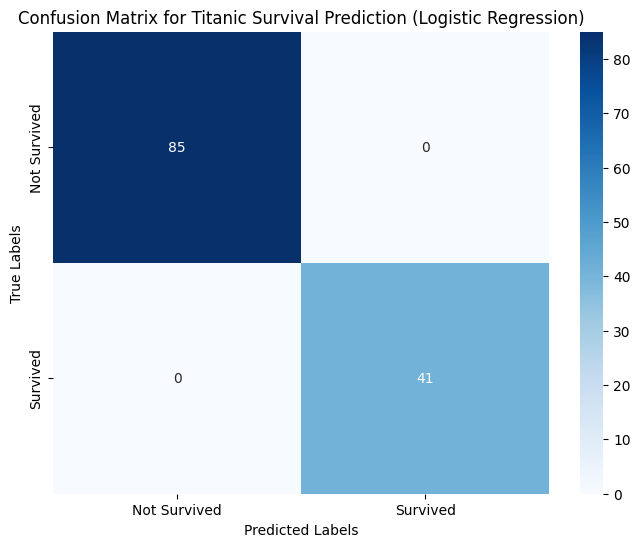

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load Titanic dataset (ensure the 'train.csv' is in the same directory)
df = pd.read_csv("/content/sample_data/tested.csv")

# Display the first few rows of the dataset
print(df.head())

# Preprocessing: Fill missing values for simplicity
# Create an imputer to fill NaN values with the median for numerical features
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the numerical features in your dataset
numerical_features = ['Age', 'Fare']  # List your numerical features
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Fill missing values for categorical features with the most frequent value
categorical_features = ['Embarked']  # List your categorical features
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

# Convert categorical variables into numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Male: 0, Female: 1
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Convert Embarked (C, Q, S) into numbers

# Select features (X) and target (y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y = df['Survived']  # Target variable (1: survived, 0: did not survive)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=5000, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix for Titanic Survival Prediction (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

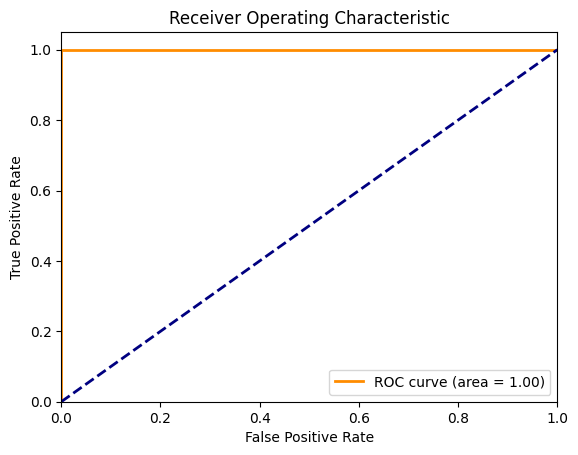

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# No need to import label_binarize for binary classification

# ... (previous code) ...

#----------------------------------------------------Compute ROC curve and AUC--------------------------------------------------
# Assuming y_test and y_pred are binary (0 and 1)
# No need to binarize for binary classification

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)  # Directly use y_test and y_pred
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Explanation of the Code:
Load Dataset:

We use the load_breast_cancer() function from sklearn.datasets to load the Breast Cancer dataset.
The dataset contains features like mean radius, mean texture, and others, which we convert into a pandas DataFrame.
Preprocessing:

The target variable (target) is added to the DataFrame.
We separate the features (X) and the target (y).
We scale the features using StandardScaler because logistic regression benefits from scaling, especially when the features have different units or magnitudes.
Model Training:

A Logistic Regression model is trained using the scaled training data (X_train_scaled and y_train).
Evaluation:

We make predictions on the test set (X_test_scaled).
A confusion matrix is computed to evaluate the model's performance.
The classification report is printed, which includes precision, recall, and F1 score for both the benign and malignant classes.
Visualization:

The confusion matrix is visualized using a heatmap for better interpretation.
Expected Output:
Confusion Matrix Heatmap: This will show the number of true positives, true negatives, false positives, and false negatives in the model’s predictions.
Classification Report: Provides detailed performance metrics like precision, recall, and F1 score for the malignant (1) and benign (0) classes.

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

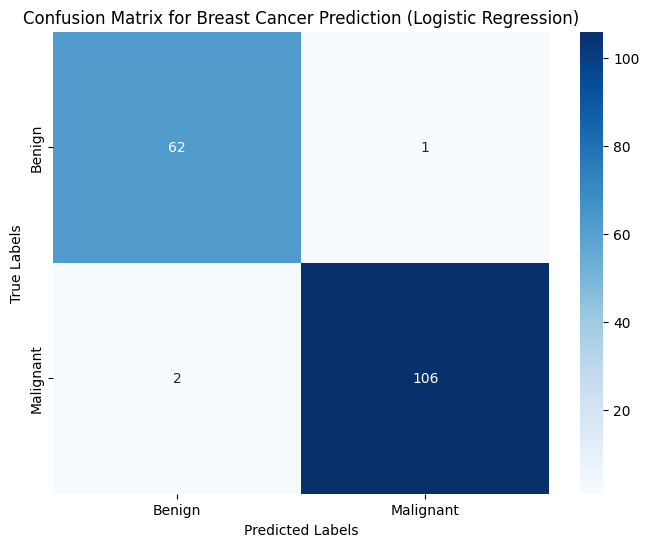

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset from sklearn
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)

# Add the target (malignant/benign) to the DataFrame
df['target'] = cancer_data.target

# Display the first few rows of the dataset
print(df.head())

# Features (X) and target (y)
X = df.drop(columns=['target'])  # All columns except the target
y = df['target']  # Target column (0 = Benign, 1 = Malignant)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (Logistic Regression benefits from scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model
clf = LogisticRegression(max_iter=5000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Breast Cancer Prediction (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


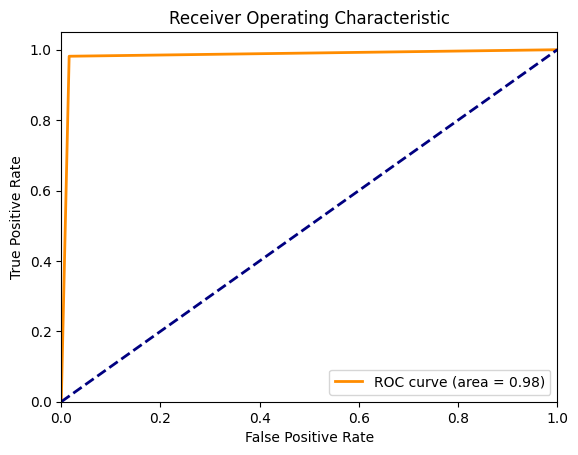

In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# No need to import label_binarize for binary classification

# ... (previous code) ...

#----------------------------------------------------Compute ROC curve and AUC--------------------------------------------------
# Assuming y_test and y_pred are binary (0 and 1)
# No need to binarize for binary classification

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)  # Directly use y_test and y_pred
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## RandomForest Model

In [ ]:
# Check for missing values
print(data.isnull().sum())  # No missing values in this dataset

# Handle outliers (optional, based on domain knowledge)
# Example: Remove wines with extreme residual sugar levels
data = data[data['residual sugar'] < data['residual sugar'].quantile(0.99)]


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Features (X) and target (y)
X = data.drop(columns=['quality'])
y = data['quality']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Add Polynomial Features for Non-Linear Relationships
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data (assuming `wine_data` is your DataFrame)
X = data.drop(columns=['quality'])  # Features
Y = data['quality']                 # Target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, Y_train)

# Predict on the testing data
Y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.34689701030927833
R-squared (R²): 0.5305156245280279
